In [149]:
import pandas as pd
import numpy as np
import seaborn as sns

In [150]:
df =pd.read_csv('machine failure.csv')

In [151]:
df.isna().sum()

UDI                        0
faktor                     1
Type                       1
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     7
Torque [Nm]                0
Tool wear [min]            1
Machine failure            2
TWF                        2
HDF                        2
PWF                        1
OSF                        1
RNF                        0
dtype: int64

In [152]:
df.duplicated().sum()

8

In [153]:
df["Machine failure"].fillna(df["Machine failure"].mean(), inplace=True)

In [154]:
df.isna().sum()

UDI                        0
faktor                     1
Type                       1
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     7
Torque [Nm]                0
Tool wear [min]            1
Machine failure            0
TWF                        2
HDF                        2
PWF                        1
OSF                        1
RNF                        0
dtype: int64

In [155]:
df.duplicated().sum()

8

### membuat nilai menjadi nul

In [156]:
df.dropna(inplace=True)

In [157]:
x= df.drop('Machine failure',axis=1).iloc[:,3:]
y= df['Machine failure']

In [158]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

y = lbl.fit_transform(y)

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
x_train,x_test,y_train,y_test = train_test_split(
    x, y, test_size=0.2, random_state=30
)

In [161]:
from sklearn.preprocessing import StandardScaler

In [162]:
ss = StandardScaler() 

In [163]:
x_train

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
4530,302.5,310.5,1918.0,21.6,131.0,0.0,0.0,0.0,0.0,0
923,295.4,305.8,1526.0,38.2,181.0,0.0,0.0,0.0,0.0,0
8285,298.8,310.5,1294.0,55.8,202.0,0.0,0.0,0.0,0.0,0
4921,303.5,312.3,1593.0,35.2,29.0,0.0,0.0,0.0,0.0,0
8416,298.5,309.6,1572.0,33.0,127.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
4871,303.6,312.3,1915.0,22.3,116.0,0.0,0.0,0.0,0.0,0
931,295.5,306.0,1423.0,45.3,205.0,0.0,0.0,0.0,0.0,0
512,297.6,309.3,1529.0,41.9,3.0,0.0,0.0,0.0,0.0,0
4529,302.4,310.4,1865.0,23.9,129.0,0.0,0.0,0.0,0.0,0


In [164]:
x_scaled_train = ss.fit_transform(x_train)
x_scaled_test = ss.fit_transform(x_test)

In [165]:
from keras import Sequential
from keras.layers import Dense

In [166]:
model = Sequential()

# input layer
model.add(Dense(16,activation = 'relu', input_shape=(None,10)))

# hidden
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))

# output
model.add(Dense(1, activation='sigmoid'))

from keras.callbacks import EarlyStopping

In [167]:
monitor_callbacks = EarlyStopping(monitor='accuracy', patience=5)

In [168]:
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [169]:
hasil = model.fit(x_scaled_train, y_train,
          validation_data=(x_scaled_test,y_test),
          epochs=95,
          verbose=1,
          callbacks=[monitor_callbacks])

Epoch 1/95


250/250 [==============================] - 1s 2ms/step - loss: -1.2632 - accuracy: 0.9620 - val_loss: -6.4514 - val_accuracy: 0.7905
Epoch 2/95
250/250 [==============================] - 0s 1ms/step - loss: -93.7729 - accuracy: 0.9415 - val_loss: -231.2254 - val_accuracy: 0.7405
Epoch 3/95
250/250 [==============================] - 0s 2ms/step - loss: -830.2453 - accuracy: 0.9436 - val_loss: -1515.6106 - val_accuracy: 0.8320
Epoch 4/95
250/250 [==============================] - 0s 1ms/step - loss: -3508.3894 - accuracy: 0.9455 - val_loss: -5272.4102 - val_accuracy: 0.7855
Epoch 5/95
250/250 [==============================] - 0s 1ms/step - loss: -10142.5938 - accuracy: 0.9437 - val_loss: -13570.8174 - val_accuracy: 0.8360
Epoch 6/95
250/250 [==============================] - 0s 1ms/step - loss: -23071.9883 - accuracy: 0.9458 - val_loss: -28441.5586 - val_accuracy: 0.8215


In [170]:
model.evaluate(x_scaled_test, y_test)

63/63 [==============================] - 0s 981us/step - loss: -28441.5586 - accuracy: 0.8215


[-28441.55859375, 0.8215000033378601]

In [171]:
x

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,298.1,308.6,1551.0,42.8,0.0,0.0,0.0,0.0,0.0,0
2,0.1,0.5,1498.0,49.4,5.0,0.0,0.0,0.0,0.0,0
3,0.2,0.6,1433.0,39.5,7.0,0.0,0.0,0.0,0.0,0
9,298.5,309.0,1741.0,28.0,21.0,0.0,0.0,0.0,0.0,0
12,298.6,309.1,1339.0,51.1,34.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
10003,298.8,308.4,1604.0,29.5,14.0,0.0,0.0,0.0,0.0,0
10004,298.9,308.4,1632.0,31.8,17.0,0.0,0.0,0.0,0.0,0
10005,299.0,308.6,1645.0,33.4,22.0,0.0,0.0,0.0,0.0,0
10006,299.0,308.7,1408.0,48.5,25.0,0.0,0.0,0.0,0.0,0


In [172]:
x_scaled_train.shape

(7996, 10)

### Modeling

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
epoch = [i+1 for i in range (7)]

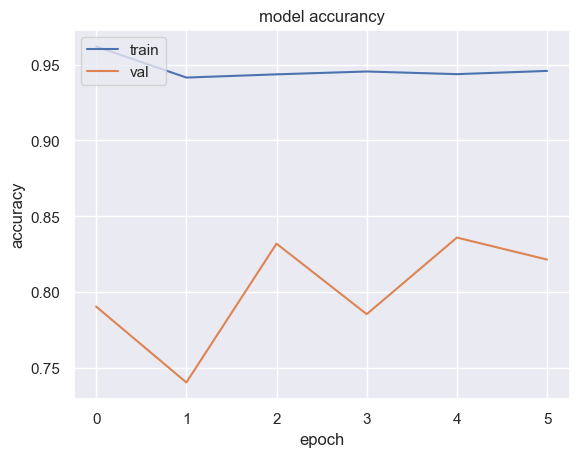

In [177]:
plt.plot(hasil.history['accuracy'])
plt.plot(hasil.history['val_accuracy'])
plt.title('model accurancy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()